# Data Cleaning
Before we apply our ML models, we need to clean and preprocess the data.
In order to clean the data we will go through different steps:
1. Data Investigation --> Investigate features and understand the structure of the data
2. Data Transformation --> Transform variables and create important features out of the raw data

In [82]:
# install libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [3]:
# import the data into pandas data frame
application_data = pd.read_csv('data/application_record.csv')
credit_data = pd.read_csv('data/credit_record.csv')

In [4]:
application_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


### Application Data
The application data set contains the data of credit card approvals applicants. The features are as follows:

ID -> Client number
CODE_GENDER -> Gender
FLAG_OWN_CAR -> Is there a car
FLAG_OWN_REALTY -> Is there a property
CNT_CHILDREN -> Number of children
AMT_INCOME_TOTAL -> Annual income
NAME_INCOME_TYPE -> Income category
NAME_EDUCATION_TYPE -> Education level
NAME_FAMILY_STATUS -> Marital status
NAME_HOUSING_TYPE -> Way of living
DAYS_BIRTH -> Birthday
DAYS_EMPLOYED -> Start date of employment (Count backwards from current day(0). If positive, it means the person currently unemployed)
FLAG_MOBIL -> Is there a mobile phone
FLAG_WORK_PHONE -> Is there a work phone
FLAG_PHONE -> Is there a phone
FLAG_EMAIL -> Is there an email
OCCUPATION_TYPE -> Occupation
CNT_FAM_MEMBERS -> Family size

In [5]:
# check for nan values
application_data.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [6]:
# For the occupation type almost 1/3 of the data is not available
# Because it is not possible to restore the missing data we will delete the occupation feature from the data set
application_data.drop('OCCUPATION_TYPE', axis=1, inplace=True)

application_data.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
CNT_FAM_MEMBERS        0
dtype: int64

In [7]:
# see important stats for all numeric values
application_data.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


No handles with labels found to put in legend.
C:\Users\mmmue\AppData\Local\Temp/ipykernel_25884/2093939645.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  application_data['DAYS_EMPLOYED'][mask] = -days_of_employment


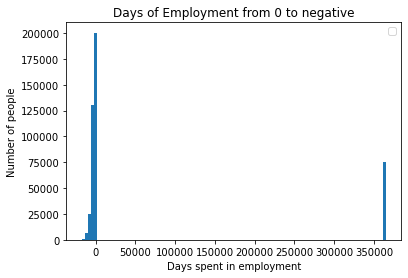

In [8]:
# We see that the DAYS_EMPLOYED Feature has some unrealistic max value (968 years). First we will investigate this issue by plotting the data.
plt.hist(application_data.DAYS_EMPLOYED, bins=100)
plt.title('Days of Employment from 0 to negative')
plt.legend()
plt.xlabel('Days spent in employment')
plt.ylabel('Number of people')

# by looking at the data set it's noticeable that the 365.243 Days employment belong to pensioners
# my hypothesis is that this value is specifically given to pensioners to mark their end of working life

# see the stats for pensioners
pensioner = application_data[['NAME_INCOME_TYPE', 'DAYS_EMPLOYED']]
pensioner = pensioner[pensioner['NAME_INCOME_TYPE'] == 'Pensioner']
pensioner.describe()

# since a pretty high day count is wired towards unemployment its not a best practice to assign this value to pensioners. Instead we will assign them the days count of someone
# that worked for 40 years for 365 * 5/7 days

# change days of employment value for pensioners
days_of_employment = 365 * (5 / 7) * 40

mask = (application_data.NAME_INCOME_TYPE == 'Pensioner')
application_data['DAYS_EMPLOYED'][mask] = -days_of_employment

In [9]:
application_data.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,-3966.638279,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,3667.346658,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-5871.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-2514.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-1094.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,-12.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [10]:
application_data.skew()
application_data.kurtosis()

C:\Users\mmmue\AppData\Local\Temp/ipykernel_25884/1759662908.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  application_data.skew()
C:\Users\mmmue\AppData\Local\Temp/ipykernel_25884/1759662908.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  application_data.kurtosis()


ID                   -0.085985
CNT_CHILDREN          5.084886
AMT_INCOME_TOTAL    324.550679
DAYS_BIRTH           -1.048479
DAYS_EMPLOYED        -0.624300
FLAG_MOBIL            0.000000
FLAG_WORK_PHONE       0.110912
FLAG_PHONE           -1.120971
FLAG_EMAIL            4.362934
CNT_FAM_MEMBERS       1.897488
dtype: float64

(array([5.36100e+04, 1.65648e+05, 1.26728e+05, 4.58980e+04, 2.70360e+04,
        8.16800e+03, 6.06100e+03, 1.98200e+03, 8.43000e+02, 1.21200e+03,
        2.77000e+02, 2.45000e+02, 3.80000e+02, 2.30000e+01, 2.90000e+01,
        5.00000e+01, 1.35000e+02, 2.60000e+01, 9.00000e+00, 6.60000e+01,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 2.90000e+01, 0.00000e+00,
        0.00000e+00, 1.60000e+01, 1.40000e+01, 0.00000e+00, 2.50000e+01,
        0.00000e+00, 0.00000e+00, 7.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 5.00000e+00, 0.00000e+00, 0.00000e+00, 6.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 6.00000e+00, 0.00000e+00, 6.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+01, 0.00000e+00, 0.00

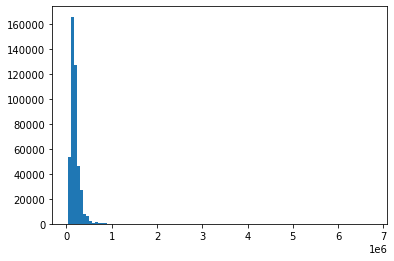

In [11]:
plt.hist(application_data.AMT_INCOME_TOTAL, bins=100)

### Visualize categorical data

Text(0.5, 1.0, 'Number of Applicants by Gender')

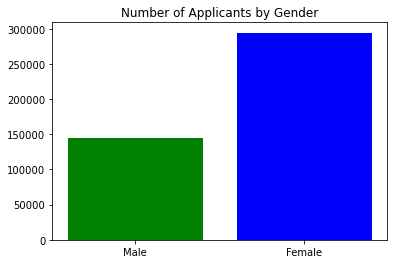

In [12]:
count_men = application_data[application_data.CODE_GENDER == 'M']['CODE_GENDER'].count()
count_women = application_data[application_data.CODE_GENDER == 'F']['CODE_GENDER'].count()

plt.bar(['Male', 'Female'], [count_men, count_women], color=('green', 'blue'))
plt.title('Number of Applicants by Gender')

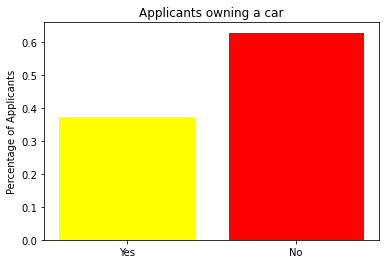

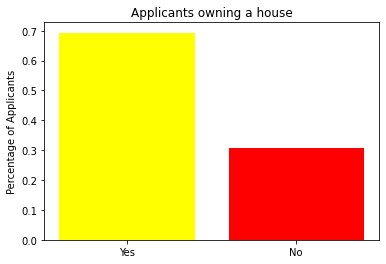

In [13]:
categories = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
labels = ['Applicants owning a car', 'Applicants owning a house']

for feature, label in zip(categories, labels):

    # calculate the occurrence of possible outputs
    count_yes = application_data[application_data[feature] == 'Y'][feature].count()
    count_no = application_data[application_data[feature] == 'N'][feature].count()

    # calculate the percentage of owners
    perc_yes = count_yes / (count_yes + count_no)

    # plot as bar chart
    plt.bar(['Yes', 'No'], [perc_yes, 1 - perc_yes], color=('yellow', 'red'))
    plt.title(label)
    plt.ylabel('Percentage of Applicants')
    plt.show()

### Credit Data
The Credit Data set stores credit account data by month starting from the current month as 0.

The data set contains three features:
ID --> User ID
MONTHS_BALANCE --> Month of the balance data
STATUS --> Number of months open credits are overdue

In [14]:
credit_data

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [15]:
# group data by id and count the number of unique status values
credit_data = credit_data.value_counts(subset=['ID', 'STATUS']).unstack(fill_value=0)

In [16]:
# to be approved for a credit loan the applicant needs to have paid back the majority of her/his loans or be overdue max 30 days
credit_data['positive'] = credit_data['0'] + credit_data['C'] + credit_data['X']
credit_data['negative'] = credit_data['1'] + credit_data['2'] + credit_data['3'] + credit_data['4'] + credit_data['5']

credit_data.loc[(credit_data['positive'] > credit_data['negative']), 'approved'] = 1
credit_data.loc[(credit_data['positive'] <= credit_data['negative']), 'approved'] = 0
credit_data

STATUS,0,1,2,3,4,5,C,X,positive,negative,approved
ID,,,,,,,,,,,
5001711,3,0,0,0,0,0,0,1,4,0,1.0
5001712,10,0,0,0,0,0,9,0,19,0,1.0
5001713,0,0,0,0,0,0,0,22,22,0,1.0
5001714,0,0,0,0,0,0,0,15,15,0,1.0
5001715,0,0,0,0,0,0,0,60,60,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5150482,12,0,0,0,0,0,6,0,18,0,1.0
5150483,0,0,0,0,0,0,0,18,18,0,1.0
5150484,12,0,0,0,0,0,1,0,13,0,1.0


In [19]:
# check if the approved feature has no nan values or other unwanted
np.unique(credit_data['approved'])

credit_data['approved'].isnull().sum()

0

In [24]:
# check how many application were not approved
credit_data['approved'].loc[credit_data['approved'] == 0].count()

185

In [76]:
# join approval feature of credit_data on application_data
credit_application_data = application_data.join(credit_data['approved'], on='ID')

# check if every user got an approved status
credit_application_data['approved'].isnull().sum()

402100

In [77]:
# drop all users without any credit data
credit_application_data.dropna(inplace=True)

In [79]:
# select all categorical features
categorical = credit_application_data.select_dtypes(['object']).columns
credit_application_data[categorical] = credit_application_data[categorical].astype('category')

In [84]:
cat_map = dict()

for category in categorical:
    cat_map[category] = dict(enumerate(credit_application_data[category].cat.categories))

print(cat_map)

with open('cat_num_mapping.json', 'w') as fp:
    json.dump(cat_map, fp, indent=4)

{'CODE_GENDER': {0: 'F', 1: 'M'}, 'FLAG_OWN_CAR': {0: 'N', 1: 'Y'}, 'FLAG_OWN_REALTY': {0: 'N', 1: 'Y'}, 'NAME_INCOME_TYPE': {0: 'Commercial associate', 1: 'Pensioner', 2: 'State servant', 3: 'Student', 4: 'Working'}, 'NAME_EDUCATION_TYPE': {0: 'Academic degree', 1: 'Higher education', 2: 'Incomplete higher', 3: 'Lower secondary', 4: 'Secondary / secondary special'}, 'NAME_FAMILY_STATUS': {0: 'Civil marriage', 1: 'Married', 2: 'Separated', 3: 'Single / not married', 4: 'Widow'}, 'NAME_HOUSING_TYPE': {0: 'Co-op apartment', 1: 'House / apartment', 2: 'Municipal apartment', 3: 'Office apartment', 4: 'Rented apartment', 5: 'With parents'}}


In [85]:
credit_application_data[categorical] = credit_application_data[categorical].apply(lambda x: x.cat.codes)
credit_application_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,approved
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542.000000,1,1,0,0,2.0,1.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,-4542.000000,1,1,0,0,2.0,1.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134.000000,1,0,0,0,2.0,1.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051.000000,1,0,1,1,1.0,1.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051.000000,1,0,1,1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434808,5149828,1,1,1,0,315000.0,4,4,1,1,-17348,-2420.000000,1,0,0,0,2.0,1.0
434809,5149834,0,0,1,0,157500.0,0,1,1,1,-12387,-1325.000000,1,0,1,1,2.0,0.0
434810,5149838,0,0,1,0,157500.0,1,1,1,1,-12387,-10428.571429,1,0,1,1,2.0,0.0
434811,5150049,0,0,1,0,283500.0,4,4,1,1,-17958,-655.000000,1,0,0,0,2.0,1.0


In [87]:
# check once again for nans
credit_application_data.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
CNT_FAM_MEMBERS        0
approved               0
dtype: int64